# I. &nbsp; DA in netflix
### 1.1 &nbsp; About Data<br>
&nbsp; + &nbsp; ID: unique id for every movies and show tv<br>
&nbsp; + &nbsp; type: identifier a movies/ TV Show<br>
&nbsp; + &nbsp; title: name a movies/ TV show<br>
&nbsp; + &nbsp; director: name director of movie/ TV show. column the director able just one name director or not director, a few of directors<br>
&nbsp; + &nbsp; Country: where the movie / show was produced. column the country able just one country or a few of country<br>
&nbsp; + &nbsp; Date_add: it was added on Netflix<br>
&nbsp; + &nbsp; release_year: Actual Release year of the move / show<br>
&nbsp; + &nbsp; Rating: TV Rating of the movie / show<br>
&nbsp; + &nbsp; Duration: Total Duration - in minutes or number of seasons<br>
### 1.2 &nbsp; implementation caculate<br>
&nbsp; + Data overview<br>
&nbsp; + clean data<br>
&nbsp; + perform analysis<br>
### 1.3 &nbsp; built dashboard (web)

In [1]:
import pandas as pd
import numpy as np
from scipy import  stats

## data overview

In [2]:
df = pd.read_csv("./netflix_titles.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   showID        8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.head()

,showID,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.isna().sum()

showID             0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
#check for duplicate data in "show_id" column
df["showID"].duplicated().any()

False

#### show columns data is null with barchar

In [7]:
data_null = round(100*(df.isna().sum()/ len(df.index)), 2).sort_values(ascending = False)

In [8]:
data_null = pd.DataFrame(data_null)
data_null.reset_index()
# rename province to state
data_null.rename(columns={0: 'percent'}, inplace=True)

In [9]:
data_null.index.name = "column"
data_null = data_null.reset_index()

In [10]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_null, x= "column", y="percent", title= "percent data is null ")
fig.show()

+ we can see, columns "director"= 30%, "country"= 9.44%, "cast"= 9.37%, "date_added"= 0.11%, "rating"= 0.08% has values null
+ most of the directors without the name of the director are from TV shows and the rest are from movies

### clean data

In [11]:
# convert obj to datetime "date_added"
df["date_added"] = pd.to_datetime(df["date_added"])

In [12]:
#putting "unknown" in the director column's null values
df['director'].fillna('Unknown', inplace=True)
#putting "unknown" in the cast and country column's null values
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [13]:
# drop is na date_added and rating
idxDate = list(df.loc[df["date_added"].isna() == True,:].index)
idxrate = list(df.loc[df["rating"].isna() == True,:].index)

In [14]:
df = df.drop(idxDate)
df = df.drop(idxrate)

In [15]:
df["duration(int64)"] = df['duration'].str.replace(r'(\ min|Seasons| Season)', '', regex=True).to_list()


In [16]:
df["duration(int64)"] = df['duration(int64)'].str.replace(r'(s)', '', regex=True).to_list()


In [17]:
df["duration(int64)"] = df["duration(int64)"].astype("int64")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   showID           8790 non-null   object        
 1   type             8790 non-null   object        
 2   title            8790 non-null   object        
 3   director         8790 non-null   object        
 4   cast             8790 non-null   object        
 5   country          8790 non-null   object        
 6   date_added       8790 non-null   datetime64[ns]
 7   release_year     8790 non-null   int64         
 8   rating           8790 non-null   object        
 9   duration         8790 non-null   object        
 10  listed_in        8790 non-null   object        
 11  description      8790 non-null   object        
 12  duration(int64)  8790 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 961.4+ KB


In [19]:
df.isna().sum()

showID             0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
duration(int64)    0
dtype: int64

In [20]:
import plotly.express as px
fig = px.box(df, x="type", y="duration(int64)", points="all")
fig.show()

+ we can see. some movies have a duration > 300 min. so we can remove movies has a duration > 300 min

### handling foreign data

In [21]:
df = df.loc[df["duration(int64)"] < 300, :]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8789 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   showID           8789 non-null   object        
 1   type             8789 non-null   object        
 2   title            8789 non-null   object        
 3   director         8789 non-null   object        
 4   cast             8789 non-null   object        
 5   country          8789 non-null   object        
 6   date_added       8789 non-null   datetime64[ns]
 7   release_year     8789 non-null   int64         
 8   rating           8789 non-null   object        
 9   duration         8789 non-null   object        
 10  listed_in        8789 non-null   object        
 11  description      8789 non-null   object        
 12  duration(int64)  8789 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 961.3+ KB


In [23]:
fig = px.box(df, x="type", y="duration(int64)", points="all", title = "boxplot data foreign data duration ")
fig.show()

+ after removing some movies that have a duration > 300 min. basically data is good.

# plot graphs Compare 

### plot graph compare duration movies average at years

In [24]:
dfAvg = df.loc[df['type'] == "Movie", :]

In [25]:
dfAvg = dfAvg.groupby(by="release_year")["duration(int64)"].mean()


In [26]:
dfAvg = pd.DataFrame(dfAvg)
dfAvg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 1942 to 2021
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration(int64)  73 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [27]:
dfAvg = dfAvg.reset_index()
dfAvg.head()

,release_year,duration(int64)
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000


In [28]:
dfAvg = dfAvg.loc[dfAvg["release_year"] > 1980,:]

In [29]:
fig = px.bar(dfAvg, x="duration(int64)", y="release_year", orientation='h',height=800,labels={
                     "duration(int64)": "duration average",
                     "release_year": "years"
                    
                 }, title= "compare duration average by year from 1980 to now" )
fig.show()

+ we can see. Duration movie average 46 min for 2021
+ Duration movie average has trend go down by years

### plot graph compare duration TV Show average at years

In [30]:
dfAvgTv = df.loc[df['type'] == "TV Show", :]

In [31]:
dfAvgTv = dfAvgTv.groupby(by="release_year")["duration(int64)"].mean()

In [32]:
dfAvgTv = pd.DataFrame(dfAvgTv)
dfAvgTv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1925 to 2021
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration(int64)  46 non-null     float64
dtypes: float64(1)
memory usage: 736.0 bytes


In [33]:
dfAvgTv = dfAvgTv.reset_index()
dfAvgTv.head()

,release_year,duration(int64)
0,1925,1.0
1,1945,1.0
2,1946,1.0
3,1963,4.0
4,1967,8.0


In [34]:
dfAvgTv = dfAvgTv.loc[dfAvgTv["release_year"] > 1990,:]

In [35]:
fig = px.bar(dfAvgTv, x="duration(int64)", y="release_year", orientation='h',height=800,labels={
                     "duration(int64)": "duration average (Seasons)",
                     "release_year": "years"
                    
                 }, title= "compare duration Tv Show average by year from 1990 to now" )
fig.show()

### plot barchart quantity movies and TVshow of country

In [36]:
# in cell the country can have countries, so we need split countries
country1 = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [37]:
country1 = pd.DataFrame(country1, columns={"country"})

In [38]:
country1 = country1.reset_index()

In [39]:
country1 = country1.groupby(["country"])["title"].count()

In [40]:
country1 =  pd.DataFrame(country1)
country1 = country1.reset_index()
# rename province to state
country1.rename(columns={0: 'count'}, inplace=True)
country1.index.name = "index"

In [41]:
country1 = country1.sort_values(by="title", ascending=False)

In [42]:
country1 = country1.iloc[0:25, :]

In [43]:
import plotly.express as px

fig = px.bar(country1, x="title", y="country", orientation='h',height=800,labels={
                     "title": "quantity",
                     "country": "name country"
                    
                 }, title= "quantity movies and TVshows of country" )
fig.show()

+ the country product movies and tv show biggest in the word

### visualize the numbers of movies and show tv over the years

In [44]:
dataMoviesAndshowtv = df[["release_year", "type"]]

In [45]:
dataMoviesAndshowtv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8789 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  8789 non-null   int64 
 1   type          8789 non-null   object
dtypes: int64(1), object(1)
memory usage: 206.0+ KB


In [46]:
dataMoviesAndshowtv.head()

,release_year,type
0,2020,Movie
1,2021,TV Show
2,2021,TV Show
3,2021,TV Show
4,2021,TV Show


In [47]:
dataMovies = dataMoviesAndshowtv.loc[dataMoviesAndshowtv["type"] == "Movie", :].groupby(by = "release_year").count()
dataTVShow = dataMoviesAndshowtv.loc[dataMoviesAndshowtv["type"] == "TV Show", :].groupby(by = "release_year").count()

In [48]:
dataMovies = dataMovies.reset_index()
dataTVShow = dataTVShow.reset_index()

In [49]:
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

In [50]:

trace1 = go.Bar(
   x = dataMovies["release_year"],
   y = dataMovies["type"],
   name = 'the number movies'
)
trace2 = go.Bar(
   x = dataTVShow["release_year"],
   y = dataTVShow["type"],
   name = 'the number TV Show'
)
fig = tools.make_subplots(rows = 1, cols = 2)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout'].update(height = 600, width = 1100, title = 'visualize the numbers of movies and show tv over the years')
iplot(fig)

C:\Users\FPTSHOP\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



+ we can see. at a time from 2000 to 2020 movies and show TV increase rapidly

### visualization compare movies and TV Show

In [51]:
dfCompareType =  df.groupby(["type"])["type"].count()


In [52]:
dfCompareType

type
Movie      6125
TV Show    2664
Name: type, dtype: int64

In [53]:
dfCompareType = pd.DataFrame(dfCompareType)
#dfCompareType.index.name = "type"
#dfCompareType = dfCompareType.reset_index()
dfCompareType.rename(columns={"type": 'count'}, inplace=True)

In [54]:
dfCompareType = dfCompareType.reset_index()
dfCompareType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    2 non-null      object
 1   count   2 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


In [55]:
dfCompareType["count"] = round(100 * (dfCompareType["count"] / 8807), 2)

In [56]:
dfCompareType

,type,count
0,Movie,69.55
1,TV Show,30.25


In [57]:
fig = px.bar(dfCompareType, x= "type", y="count", title= "percent data movies and TV Show")
fig.show()

+ we can see. the movies have amount percentage than TV shows have amount percent

### which is theme trend ??

In [58]:
df["listed_in"].mode()

0    Dramas, International Movies
dtype: object

### which country has the movie the most development "Dramas, International Movies"

In [59]:
dfMovieAAD = df.loc[df["listed_in"] == "Dramas, International Movies", ["country", "duration", "rating"]]

In [60]:
dfMovieAAD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 12 to 8799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   362 non-null    object
 1   duration  362 non-null    object
 2   rating    362 non-null    object
dtypes: object(3)
memory usage: 11.3+ KB


In [61]:
dfMovieAAD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 12 to 8799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   362 non-null    object
 1   duration  362 non-null    object
 2   rating    362 non-null    object
dtypes: object(3)
memory usage: 11.3+ KB


In [62]:
mode = dfMovieAAD["country"].mode()
mode

0    India
dtype: object

### plot a graph show rating code of theme "Dramas, International Movies" country <b>india</b>

+ <B>TV_Y</B>:&nbsp; Designed to be appropriate for all children
+ <B>TV-Y7</B>:&nbsp;Suitable for ages 7 and up
+ <B>G</B>:&nbsp; Suitable for General Audiences
+ <B>TV-G</B>:&nbsp; Suitable for General Audiences
+ <B>PG</B>:&nbsp; Parental Guidance suggested
+ <B>TV-PG</B>:&nbsp; Parental Guidance suggested
+ <B>PG-13</B>:&nbsp; Parents strongly cautioned. May be Inappropriate for ages 12 and under.
+ <B>TV-14</B>:&nbsp; Parents strongly cautioned. May not be suitable for ages 14 and under.
+ <B>R</B>:&nbsp; Restricted. May be inappropriate for ages 17 and under.
+ <B>TV-MA</B>:&nbsp; For Mature Audiences. May not be suitable for ages 17 and under.
+ <B>NC-17</B>:&nbsp; Inappropriate for ages 17 and under

In [63]:
dfMovieAAD = dfMovieAAD.loc[dfMovieAAD["country"] == mode[0], :]

In [64]:
dfMovieAAD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 190 to 8799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   118 non-null    object
 1   duration  118 non-null    object
 2   rating    118 non-null    object
dtypes: object(3)
memory usage: 3.7+ KB


In [65]:
dfMovieAAD = dfMovieAAD.groupby(["rating"])["rating"].count()

In [66]:
dfMovieAAD = pd.DataFrame(dfMovieAAD)

In [67]:
dfMovieAAD

,rating
rating,
NR,1
PG,1
TV-14,73
TV-MA,28
TV-PG,15


In [68]:
dfMovieAAD.rename(columns={"rating": 'percent'}, inplace=True)

In [69]:
dfMovieAAD = dfMovieAAD.reset_index()
dfMovieAAD

,rating,percent
0,NR,1
1,PG,1
2,TV-14,73
3,TV-MA,28
4,TV-PG,15


In [70]:
dfMovieAAD["percent"] = round(100*(dfMovieAAD["percent"]/ dfMovieAAD["percent"].sum()), 2).sort_values(ascending = False)

In [71]:
dfMovieAAD

,rating,percent
0,NR,0.85
1,PG,0.85
2,TV-14,61.86
3,TV-MA,23.73
4,TV-PG,12.71


In [72]:
fig = px.pie(dfMovieAAD, values='percent', names='rating', title='percent rating of "Dramas, International Movies"')
fig.show()

## A film product company want to make a movie titled "Dramas, International Movies". but they dont know what is duration resomable (meaning viewers don't feel the movie is too long then they will minimize segment unresomable ) ??

In [73]:
dfAAD = df.loc[df["listed_in"] == "Dramas, International Movies", ["title","country", "release_year","rating", "duration", "duration(int64)"]]

In [74]:
dfAAD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 12 to 8799
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            362 non-null    object
 1   country          362 non-null    object
 2   release_year     362 non-null    int64 
 3   rating           362 non-null    object
 4   duration         362 non-null    object
 5   duration(int64)  362 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 19.8+ KB


In [75]:
dfAAD.head()

,title,country,release_year,rating,duration,duration(int64)
12,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127 min,127
73,King of Boys,Nigeria,2018,TV-MA,182 min,182
190,Thimmarusu,India,2021,TV-14,125 min,125
256,Nneka The Pretty Serpent,Unknown,2020,TV-14,140 min,140
268,Unroyal,Unknown,2020,TV-MA,97 min,97


In [76]:
dfAAD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 12 to 8799
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            362 non-null    object
 1   country          362 non-null    object
 2   release_year     362 non-null    int64 
 3   rating           362 non-null    object
 4   duration         362 non-null    object
 5   duration(int64)  362 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 19.8+ KB


In [77]:
dfAAD.head()

,title,country,release_year,rating,duration,duration(int64)
12,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127 min,127
73,King of Boys,Nigeria,2018,TV-MA,182 min,182
190,Thimmarusu,India,2021,TV-14,125 min,125
256,Nneka The Pretty Serpent,Unknown,2020,TV-14,140 min,140
268,Unroyal,Unknown,2020,TV-MA,97 min,97


&nbsp; + &nbsp; everage a movie titled "Dramas, International Movies" have duration less than 120 min with the level of significance 5%

In [78]:
dfAAD.describe()

,release_year,duration(int64)
count,362.000000,362.000000
mean,2014.240331,112.502762
std,7.066775,24.352473
min,1959.000000,12.000000
25%,2012.250000,97.000000
50%,2016.000000,108.000000
75%,2018.000000,125.000000
max,2021.000000,209.000000


In [79]:
fig = px.histogram(dfAAD, x="duration(int64)")
fig.update_layout(bargap=0.2)
fig.show()

+ H0: <= 120 min
+ H1: > 120 min
+ the test: One sample T test

In [80]:
print (stats.ttest_1samp(dfAAD["duration(int64)"],120))

Ttest_1sampResult(statistic=-5.857502628504762, pvalue=1.0581891472861781e-08)


+ pvalue < 2*0.05
+ statistic < 0
=> qualified to refute H0. (duration mean is > 120 min)

In [81]:
fig = px.scatter(dfAAD,x=dfAAD["rating"], y=dfAAD["duration(int64)"])
fig.show()

In [82]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
lb = encoder.fit_transform(dfAAD["rating"])
print(lb)

[6 6 4 4 6 3 7 6 4 6 6 7 6 4 6 7 5 4 3 2 4 4 6 4 6 4 6 6 6 4 6 6 6 4 7 6 1
 6 6 6 6 4 2 6 4 6 6 4 6 4 6 4 4 2 4 6 6 4 6 4 6 7 6 6 7 2 6 6 6 7 4 4 6 6
 6 7 4 6 6 7 6 7 4 4 7 6 4 4 6 6 7 4 6 6 6 6 4 4 6 4 4 4 4 4 4 4 5 6 4 6 4
 7 4 7 4 4 6 6 4 4 4 6 4 6 6 3 6 6 6 6 4 6 6 6 4 6 6 6 4 6 6 2 6 6 4 6 4 7
 4 6 4 7 6 4 6 6 6 6 6 6 6 6 4 4 4 6 4 6 4 6 6 4 6 6 4 4 4 6 6 6 3 2 4 6 6
 2 4 4 7 4 4 6 6 6 4 4 7 6 4 6 6 4 6 7 6 6 7 7 4 4 6 4 6 6 6 4 3 4 6 6 3 4
 6 6 6 6 6 6 4 7 6 6 6 4 6 6 6 4 6 6 6 4 4 4 4 6 2 2 4 4 6 4 4 4 4 6 4 6 4
 6 4 3 4 4 4 7 4 6 7 0 4 7 0 7 3 4 6 4 6 4 4 4 4 4 7 4 6 4 7 6 7 6 4 2 4 4
 4 3 4 6 7 4 7 4 6 6 6 4 7 4 7 4 4 0 4 4 6 4 6 4 6 7 2 4 4 4 4 4 6 4 4 6 4
 6 4 7 6 6 6 2 7 3 4 6 4 3 4 6 3 6 0 0 6 4 3 4 4 6 6 6 6 4]


In [83]:
dfAAD["encoderRating"] = lb

In [84]:
dfAAD.head()

,title,country,release_year,rating,duration,duration(int64),encoderRating
12,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127 min,127,6
73,King of Boys,Nigeria,2018,TV-MA,182 min,182,6
190,Thimmarusu,India,2021,TV-14,125 min,125,4
256,Nneka The Pretty Serpent,Unknown,2020,TV-14,140 min,140,4
268,Unroyal,Unknown,2020,TV-MA,97 min,97,6


In [85]:
dfAAD.loc[dfAAD[["rating","encoderRating"]].duplicated() == False, ["rating", "encoderRating"]]

,rating,encoderRating
12,TV-MA,6
190,TV-14,4
285,R,3
306,TV-PG,7
534,TV-G,5
606,PG-13,2
1022,PG,1
6608,NR,0


In [86]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X = dfAAD['encoderRating'].values.reshape(-1,1)
y = dfAAD['duration(int64)'].values.reshape(-1,1)
# chia bộ dữ liệu làm 2 tập train và test theo tỉ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  # Khai báo mô hình hồi quy tuyến tính
regressor.fit(X_train, y_train) 

LinearRegression()

In [87]:
# duration1 = a* encoderRating + b
print("a = " , regressor.intercept_)
print("b = " , regressor.coef_)

a =  [119.03701913]
b =  [[-1.40062746]]


In [88]:
y_pred = regressor.predict(X_test) # dự đoán trên rating của bộ dữ liệu test

In [89]:
## tính toán R2 của model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, regressor.predict(X_train))
print("R2 on the model's training set is:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 on the model's test set is:" + str(r2_test))

df = pd.DataFrame({'rating': X_test.flatten(), 'duration1': y_test.flatten(), 'rating': y_pred.flatten()})
print("\n") # xuống dòng
print("Evaluation of the average predictive power on the test set")
print('Average forecast error:', metrics.mean_absolute_error(y_test, y_pred)) 

R2 on the model's training set is:0.00667053471292256
R2 on the model's test set is:0.038807956150774814


Evaluation of the average predictive power on the test set
Average forecast error: 17.544519968294775


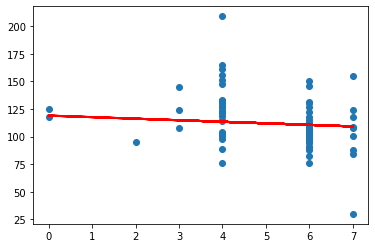

In [90]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [91]:
# lưu trữ mô hình vào máy tính
import pickle # thư viện  giúp lưu trữ mô hình
filename = 'model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [92]:
# Some time later.....
# sử dụng mô hình
#loaded_model = LinearRegression()
loaded_model = pickle.load(open(filename, 'rb'))
x = [[0], [1], [4], [6], [7]]
y_pred = loaded_model.predict(x)
y_pred

array([[119.03701913],
       [117.63639166],
       [113.43450927],
       [110.63325435],
       [109.23262688]])

+ &nbsp; If the movie wants to be rated "NR", the length is 120 minutes
+ &nbsp; If the movie wants to be rated "PG", the length is 117 minutes
+ &nbsp; If the movie wants to be rated "TV-14", the length is 113 minutes
+ &nbsp; If the movie wants to be rated "TV-MA", the length is 111 minutes
+ &nbsp; If the movie wants to be rated "TV-PG", the length is 110 minutes
